In [14]:
# run this cell!
library(tidyverse)
library(readr)
library(dplyr)

In [15]:
url_players <- "https://raw.githubusercontent.com/nliu0729/dsci_100_project/main/players.csv"
download.file(url_players, "players.csv")
players <- read_csv(url_players)

url_sessions <- "https://raw.githubusercontent.com/nliu0729/dsci_100_project/main/sessions.csv"
download.file(url_sessions, "sessions.csv")
sessions <- read_csv(url_sessions)

Rows: 196 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, Age
lgl (1): subscribe

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 1535 Columns: 5
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (3): hashedEmail, start_time, end_time
dbl (2): original_start_time, original_end_time

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


### **(1) Data Description**

In [16]:
# players summary statistics
players_summary <- summary(players)
players_summary

players_mean <- players |>
    summarize(avg_played_hours = mean(played_hours),
             avg_age = mean(Age, na.rm = TRUE))
players_mean <- round(players_mean, 2)
players_mean

  experience        subscribe       hashedEmail         played_hours    
 Length:196         Mode :logical   Length:196         Min.   :  0.000  
 Class :character   FALSE:52        Class :character   1st Qu.:  0.000  
 Mode  :character   TRUE :144       Mode  :character   Median :  0.100  
                                                       Mean   :  5.846  
                                                       3rd Qu.:  0.600  
                                                       Max.   :223.100  
                                                                        
     name              gender               Age       
 Length:196         Length:196         Min.   : 9.00  
 Class :character   Class :character   1st Qu.:17.00  
 Mode  :character   Mode  :character   Median :19.00  
                                       Mean   :21.14  
                                       3rd Qu.:22.75  
                                       Max.   :58.00  
                               

avg_played_hours,avg_age
<dbl>,<dbl>
5.85,21.14


Players (players.csv):

* 196 observations
* 7 variables
  * *experience*: a **character** variable that indicates the player's experience: beginner, amateur, regular, pro, or veteran
  * *subscribe*: a **character** variable that indicates whether the player is subscribed to a game-related newsletter (true or false)
  * *hashedEmail*: a **character** variable that reports a player's hashed email address
  * *played_hours*: a **double** variable that shows the number of hours each individual played
  * *name*: a **character** variable that shows the player's name
  * *gender*: a **character** variable that shows the player's gender
  * *Age*: a **double** variable that shows the player's age
* Issues/potential issues:
  * the subscribe variable is stored as logical, which might make it difficult to use predictive methods with subscribe as the response variable
  * large range of values in played_hours can distort visualizations (i.e. bar plots)

The mean played_hours is 5.85 hours, and the mean age is 21.14 years.

Age, experience level, email address, and gender were collected through self-reporting when signing up, and playtime was collected through the game server.

In [17]:
# sessions summary statistics
sessions_summary <- summary(sessions)
sessions_summary

sessions_mean <- sessions |>
    summarize(avg_start_time = mean(original_start_time),
              avg_end_time = mean(original_end_time, na.rm = TRUE))
sessions_mean <- round(sessions_mean, 2)
sessions_mean 

 hashedEmail         start_time          end_time         original_start_time
 Length:1535        Length:1535        Length:1535        Min.   :1.712e+12  
 Class :character   Class :character   Class :character   1st Qu.:1.716e+12  
 Mode  :character   Mode  :character   Mode  :character   Median :1.719e+12  
                                                          Mean   :1.719e+12  
                                                          3rd Qu.:1.722e+12  
                                                          Max.   :1.727e+12  
                                                                             
 original_end_time  
 Min.   :1.712e+12  
 1st Qu.:1.716e+12  
 Median :1.719e+12  
 Mean   :1.719e+12  
 3rd Qu.:1.722e+12  
 Max.   :1.727e+12  
 NA's   :2          

avg_start_time,avg_end_time
<dbl>,<dbl>
1.719201e+12,1.719196e+12


Sessions (sessions.csv):

* 1535 observations
* 5 variables
  * *hashedEmail*: a **character** variable that displays the player's hashed email
  * *start_time*: a **character** variable that shows the player's start time, formatted for human-readability as DD/MM/YYYY and time (30/06/2024 18:24)
  * *end_time*: a **character** variable that shows the player's end time, formatted for human-readability as DD/MM/YYYY and time
  * *original_start_time*: a **double** variable that shows the raw timestamp for start time from the server (Unix timestamp)
  * *original_end_time*: a **double** variable that shows the raw timestamp for end time from the server (Unix timestamp)
* Issues/potential issues:
  * Format of the start_time and end_time are characters rather than quantitative numbers, which might make summarization difficult
  * Original start and end times are numeric but not human-readable

The mean original start and end time is 1.72e+12.

All of this data was collected through the server. 

### **(2) Question**

Broad: what player characteristics and behaviours are most predictive of subscribing to a game-related newsletter, and how do these features differ between various player types? (Question 2)

Specific: Can a game player's playing duration and age predict if they will subscribe to a game-related newsletter?

Data from players.csv will allow me to address the question by providing information regarding each player's time (hours) they play, age, and subscription status. Through wrangling the data by selecting for only the variables I will use, the dataset will have increased reability and I will be able to use predictive models on playtime and age to predict subscription status. Since players.csv contains all the information I require to answer my question, I won't be using sessions.csv.

### **(3) Exploratory data analysis and visualization**

In [18]:
# loading data
players <- read_csv(url_players)
head(players)

Rows: 196 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, Age
lgl (1): subscribe

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


experience,subscribe,hashedEmail,played_hours,name,gender,Age
<chr>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<dbl>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17
Amateur,TRUE,23fe711e0e3b77f1da7aa221ab1192afe21648d47d2b4fa7a5a659ff443a0eb5,0.7,Flora,Female,21
Regular,TRUE,7dc01f10bf20671ecfccdac23812b1b415acd42c2147cb0af4d48fcce2420f3e,0.1,Kylie,Male,21
Amateur,TRUE,f58aad5996a435f16b0284a3b267f973f9af99e7a89bee0430055a44fa92f977,0.0,Adrian,Female,17


In [19]:
# wrangling data
players_tidy <- players |>
    select(played_hours, subscribe, Age) |>
    mutate(subscribe = as_factor(subscribe)) |>
    mutate(subscribe = fct_recode(subscribe, "Subscribed" = "TRUE", "Not subscribed" = "FALSE"))
players_tidy

played_hours,subscribe,Age
<dbl>,<fct>,<dbl>
30.3,Subscribed,9
3.8,Subscribed,17
0.0,Not subscribed,17
0.7,Subscribed,21
0.1,Subscribed,21
0.0,Subscribed,17
0.0,Subscribed,19
0.0,Not subscribed,21
0.1,Subscribed,47


In [20]:
# mean for each quantitative variable in players.csv
players_avg <- players |>
    summarize(avg_played_hours = mean(played_hours),
              avg_Age = mean(Age, na.rm = TRUE))
players_avg

avg_played_hours,avg_Age
<dbl>,<dbl>
5.845918,21.13918


Warning message:
“Removed 2 rows containing missing values or values outside the scale range
(`geom_point()`).”


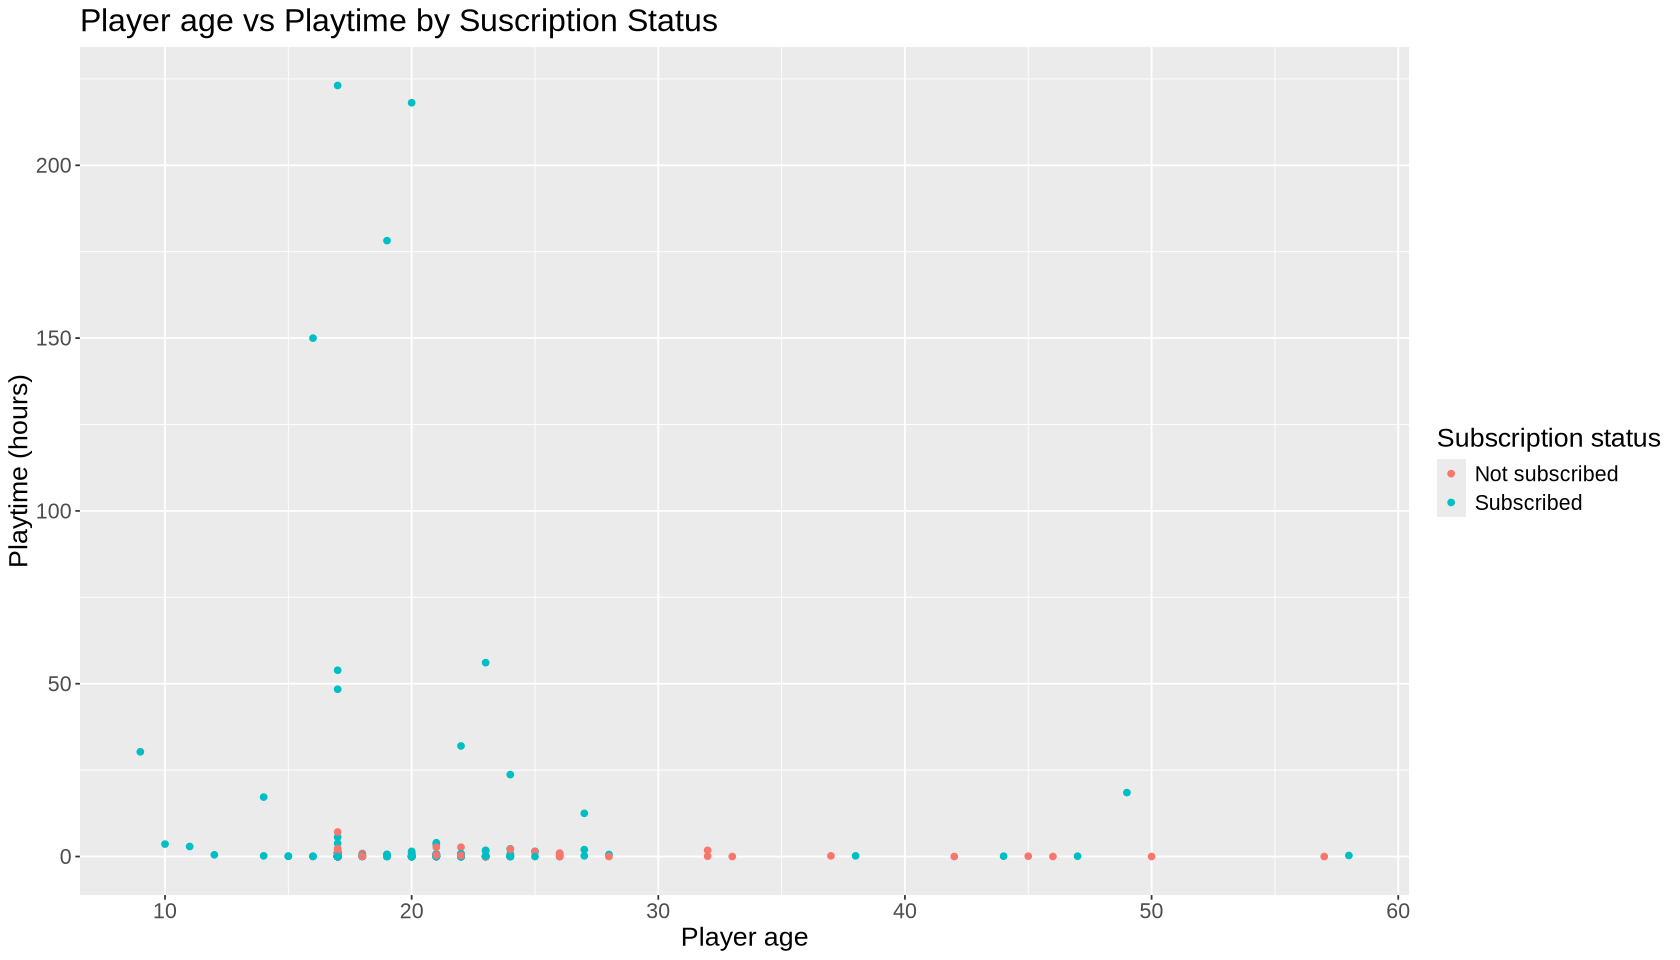

In [52]:
# visualization
options(repr.plot.width = 14, repr.plot.height = 8)

age_v_playtime <- players_tidy |>
    ggplot(aes(x = Age, y = played_hours, color = subscribe)) +
        geom_point() +
        labs(x = "Player age",
             y = "Playtime (hours)",
             title = "Player age vs Playtime by Suscription Status",
             color = "Subscription status") +
        theme(text = element_text(size = 16))
age_v_playtime

Insights
* Age vs Playtime plot suggests very weak negative relationship; playtime tends to decrease as age increases
* Most data clusters at ages below 30, showing that most players who play/log more hours are relatively young
* "Subscribed" status slightly associated with higher playtime
* Most players, regardless of age, have low playtime

Warning message:
“Removed 2 rows containing non-finite outside the scale range (`stat_bin()`).”


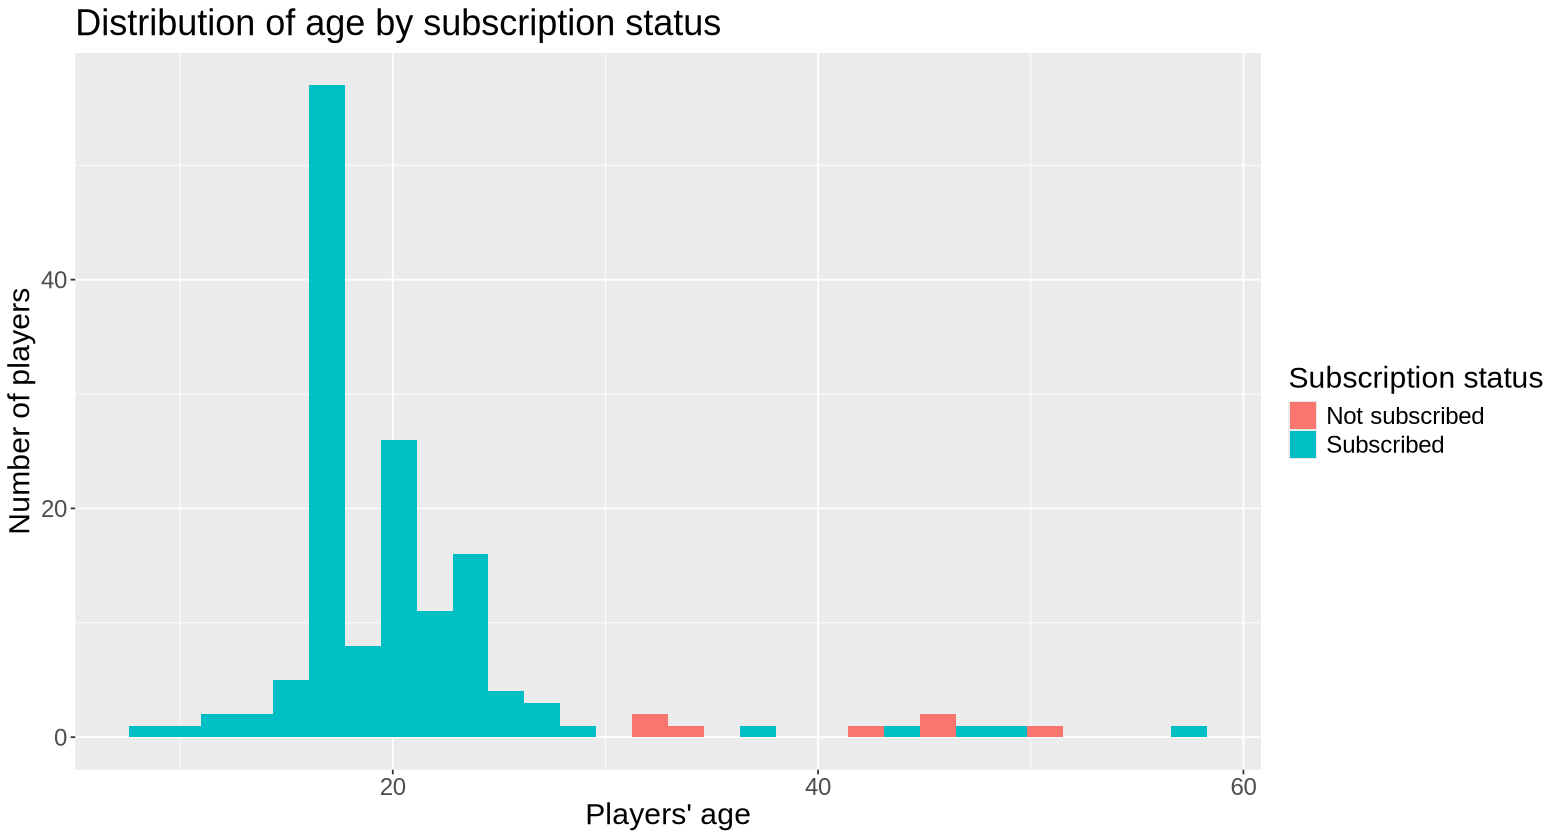

In [33]:
# visualization
options(repr.plot.width = 13, repr.plot.height = 7)

age_v_sub <- players_tidy |>
    ggplot(aes(x = Age, fill = subscribe)) +
        geom_histogram(position = "identity", bins = 30) +
        labs(x = "Players' age",
             y = "Number of players",
             title = "Distribution of age by subscription status",
             fill = "Subscription status") +
        theme(text = element_text(size = 18))
age_v_sub

**(4) Methods and plan**

**(5) GitHub repository**

https://github.com/nliu0729/dsci_100_project.git